In [29]:
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000 # avoid matplotlib overflow error
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = '11'

In [2]:
# pred_files = os.listdir("./output/csvs")

In [3]:
# def qq_manual(model, dataset, s1, s2):
#     plt.scatter(s1, s2)
#     # sm.qqplot_2samples(s1, s2, line='s')
#     plt.title("%s-%s"%(model, dataset))
#     plt.xlabel('y')
#     plt.ylabel('y_pred')
#     # plt.title('QQ Plot of series1 vs series2')
#     plt.grid(True)

# Create error file for all experiments

In [4]:
# # Create error file for all experiments
# from tools.dataset import get_dataset
# from tools.models import get_model_trainer
# from tools.preprocess import timeseries_split
# missing = []
# df = pd.DataFrame(columns = ["error", "type", "model", "dataset", "extra_feature"])
# for is_extra_feature_enabled in [True, False]:
#     extra_feat_txt = "-exf" if is_extra_feature_enabled else ""
#     for dataset_name in ["online_retail", "online_retail_2", "product_demand", "future_sales", "livestock_meat_import"]:
#         idx = 1
#         for model_name in ["xgboost", "explainable_boosting", "ssl+tabnet", "tabnet"]:
#             try:
#                 idx+=1
#                 filename1 = f"./output/csvs/{dataset_name}_{model_name}_train{extra_feat_txt}.csv"
#                 filename2 = f"./output/csvs/{dataset_name}_{model_name}_test{extra_feat_txt}.csv"
#                 df_train = pd.read_csv(filename1)
#                 df_test = pd.read_csv(filename2)
#                 y_train, y_train_pred = df_train['y'], df_train['y_pred']
#                 y_test, y_test_pred = df_test['y'], df_test['y_pred']
#                 df1 = pd.DataFrame(dict(error=y_train - y_train_pred, type="train", model=model_name, dataset=dataset_name, extra_feature=is_extra_feature_enabled))
#                 df2 = pd.DataFrame(dict(error=y_test - y_test_pred, type="test", model=model_name, dataset=dataset_name, extra_feature=is_extra_feature_enabled))
#                 df = pd.concat([df, df1, df2], axis=0)
#                 print(df.shape)
#             except Exception as e:
#                 missing.append(str(e))
# df.to_csv("error.csv", index=False) # ENABLE THIS LINE TO SAVE THE DATA
# missing

# ..
<!-- # Missing Prediction Files
- "[Errno 2] No such file or directory: './output/csvs/online_retail_explainable_boosting_train-exf.csv'",
- "[Errno 2] No such file or directory: './output/csvs/online_retail_2_explainable_boosting_train-exf.csv'",
- "[Errno 2] No such file or directory: './output/csvs/product_demand_explainable_boosting_train-exf.csv'",
- "[Errno 2] No such file or directory: './output/csvs/future_sales_explainable_boosting_train-exf.csv'",
- "[Errno 2] No such file or directory: './output/csvs/livestock_meat_import_explainable_boosting_train-exf.csv'",
- "[Errno 2] No such file or directory: './output/csvs/online_retail_xgboost_train.csv'",
- "[Errno 2] No such file or directory: './output/csvs/online_retail_explainable_boosting_train.csv'",
- "[Errno 2] No such file or directory: './output/csvs/online_retail_2_xgboost_train.csv'",
- "[Errno 2] No such file or directory: './output/csvs/online_retail_2_explainable_boosting_train.csv'",
- "[Errno 2] No such file or directory: './output/csvs/product_demand_xgboost_train.csv'",
- "[Errno 2] No such file or directory: './output/csvs/product_demand_explainable_boosting_train.csv'",
- "[Errno 2] No such file or directory: './output/csvs/future_sales_xgboost_train.csv'",
- "[Errno 2] No such file or directory: './output/csvs/future_sales_explainable_boosting_train.csv'",
- "[Errno 2] No such file or directory: './output/csvs/livestock_meat_import_xgboost_train.csv'",
- "[Errno 2] No such file or directory: './output/csvs/livestock_meat_import_explainable_boosting_train.csv'" -->

In [5]:
# from tools.dataset import get_dataset
# from tools.models import get_model_trainer
# from tools.preprocess import timeseries_split
# missing = []
# df = pd.DataFrame(columns = ["error", "type", "model", "dataset", "extra_feature"])
# for is_extra_feature_enabled in [True, False]:
#     extra_feat_txt = "-exf" if is_extra_feature_enabled else ""
#     for dataset_name in ["online_retail", "online_retail_2", "product_demand", "future_sales", "livestock_meat_import"]:
#         plt.figure(figsize=(20, 4))
#         idx = 1
#         for model_name in ["xgboost", "explainable_boosting", "ssl+tabnet", "tabnet"]:
#             try:
#                 ax = plt.subplot(1, 4, idx)
#                 idx+=1
#                 filename1 = f"./output/csvs/{dataset_name}_{model_name}_train{extra_feat_txt}.csv"
#                 filename2 = f"./output/csvs/{dataset_name}_{model_name}_test{extra_feat_txt}.csv"
#                 df_train = pd.read_csv(filename1)
#                 df_test = pd.read_csv(filename2)
#                 y_train, y_train_pred = df_train['y'], df_train['y_pred']
#                 y_test, y_test_pred = df_test['y'], df_test['y_pred']
#                 # series.append(dict("model"))
#                 df1 = pd.DataFrame(dict(error=y_train - y_train_pred, type="train", model=model_name, dataset=dataset_name, extra_feature=is_extra_feature_enabled))
#                 df2 = pd.DataFrame(dict(error=y_test - y_test_pred, type="test", model=model_name, dataset=dataset_name, extra_feature=is_extra_feature_enabled))
#                 df = pd.concat([df1, df2], axis=0)
#                 sns.kdeplot(data=df, x="error", hue="type", ax=ax)
#                 # display(df.groupby(by="type").mean())
#                 # qq_manual(model_name, "%s%s"%(dataset_name, extra_feat_txt), y_train, y_train_pred)
#             except Exception as e:
#                 missing.append(str(e))
#         plt.show()

# Model Average error vs average time

In [57]:
metrics_pair = [
    ["test_mae", "train_mae", 100], ["test_mse", "train_mse", 1000000000], ["test_mape", "train_mape", 1000000000000], ["train_rmse", "test_rmse", 100]
]
data = []
for metrcs in metrics_pair:
    a, b, step = metrcs
    metric_name = a.replace('test_', '').replace('train_', '')
    aver[metric_name] = {}
    for model in df.model.unique():
        tdf = df[df.model == model][[a,b, "model", "Duration Seconds"]].describe().loc[['mean']]
        avg_error = np.mean(tdf[[a,b]])
        avg_time = tdf["Duration Seconds"].values[0]
        data.append(dict(error=avg_error, time=avg_time, model=model, metric=metric_name))

datadf = pd.DataFrame(data)
datadf

,error,time,model,metric
0,1.452503e+05,1207.910,explainable_boosting,mae
1,2.196606e+05,2847.000,ssl+tabnet,mae
2,1.958692e+05,1576.800,tabnet,mae
3,7.532682e+04,119.275,xgboost,mae
4,1.495743e+12,1207.910,explainable_boosting,mse
5,6.683693e+12,2847.000,ssl+tabnet,mse
6,4.782904e+12,1576.800,tabnet,mse
7,4.985888e+11,119.275,xgboost,mse
8,2.836517e+16,1207.910,explainable_boosting,mape
9,3.975753e+16,2847.000,ssl+tabnet,mape


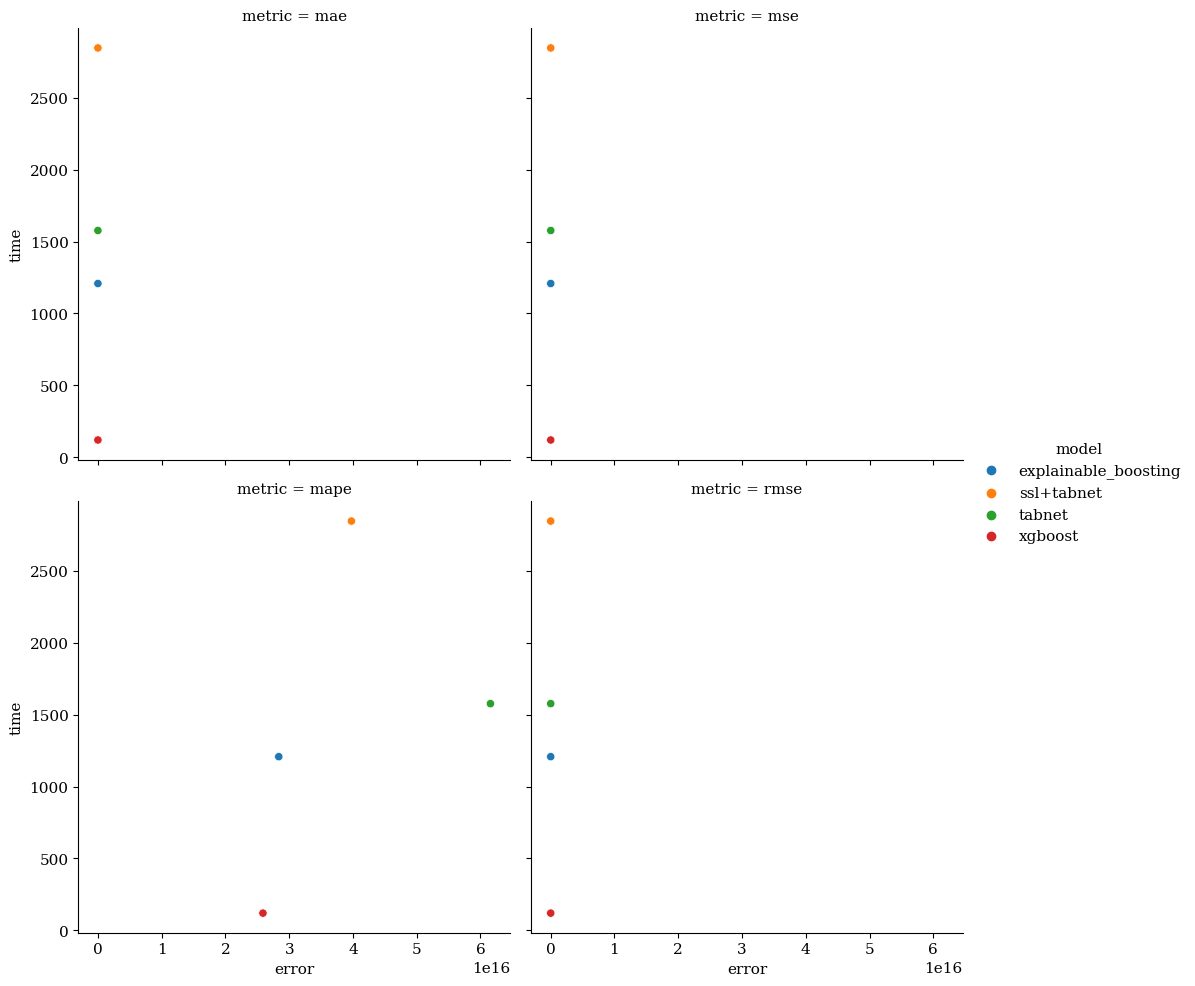

In [92]:
ax = sns.relplot(data=datadf, x='error', y='time', hue='model', col="metric", kind="scatter", col_wrap=2)
ax.savefig("error-vs-duration.png")
plt.show()

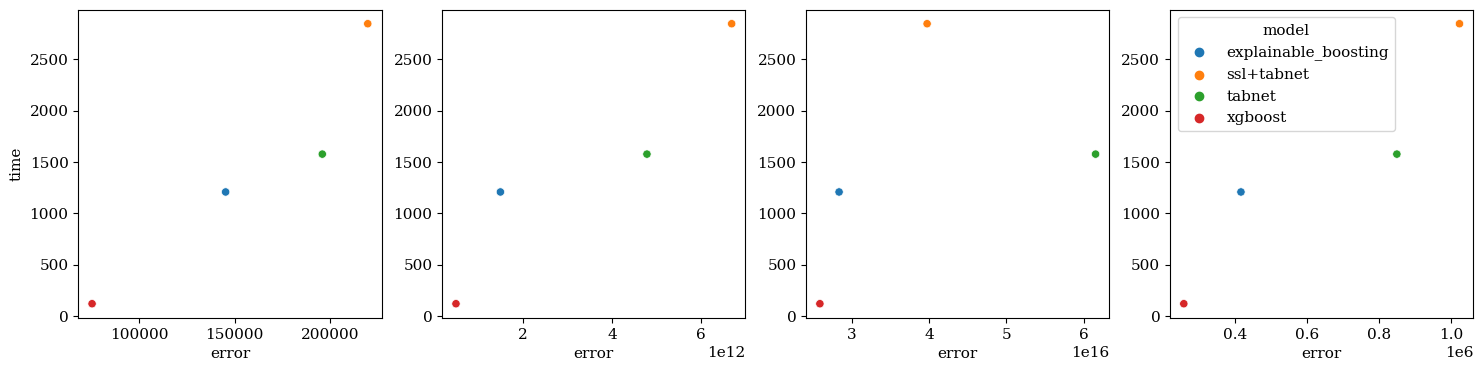

In [77]:
plt.figure(figsize=(18, 4))
for idx, metric in enumerate(datadf.metric.unique()):
    ax = plt.subplot(1, 4, idx+1)
    ax = sns.scatterplot(data=datadf[datadf.metric == metric], x='error', y='time', hue='model', ax=ax, legend=idx==3, col="metric")
    if idx != 0:
        ax.set_ylabel("")
plt.savefig("%s-vs-duration.png"%metric)
plt.show()

# Hypothesis Testing

# Hypothesis to test
1. Which model causes the highest average error
1. Which model causes the lowest average error
1. Which dataset experienced the highest average error
1. Which dataset experienced the lowest average error
1. Which dataset+model causes the highest average error
1. Which dataset+model causes the lowest average error

In [6]:
df = pd.read_excel("all-results-trimed.xlsx")

# Method to test the hypothesis
- 

https://medium.com/illumination/how-to-perform-hypothesis-testing-using-python-bf71c2d6f627

In [7]:
# {col:df[col].unique() for col in df.columns if col != "error"}
df.head()

,Duration,Duration Seconds,dataset,extra_feat,feature_count,model,total size,test_size,time_period_sec_txt,time_period_test_txt,time_period_train_txt,train_size,test_mae,test_mape,test_mse,test_rmse,train_mae,train_mape,train_mse,train_rmse
0,1.7h,6120.0,future_sales,False,7,explainable_boosting,2935849,587170,1033 days 00:00:00,298 days 00:00:00,735 days 00:00:00,2348679,4.839421e-01,0.321990,1.858582e+01,4.311127e+00,3.941223e-01,0.254645,3.250366e+00,1.802877e+00
1,2.6h,9360.0,future_sales,False,7,ssl+tabnet,2935849,587170,1033 days 00:00:00,298 days 00:00:00,735 days 00:00:00,2348679,4.294539e-01,0.247771,1.887979e+01,4.345088e+00,4.170997e-01,0.249980,3.798161e+00,1.948887e+00
2,42.1min,2526.0,future_sales,False,7,tabnet,2935849,587170,1033 days 00:00:00,298 days 00:00:00,735 days 00:00:00,2348679,4.104068e-01,0.238966,1.872326e+01,4.327038e+00,3.706080e-01,0.215676,3.481449e+00,1.865864e+00
3,4.4min,264.0,future_sales,False,7,xgboost,2935849,587170,1033 days 00:00:00,298 days 00:00:00,735 days 00:00:00,2348679,3.936758e-01,0.229396,1.491996e+01,3.862637e+00,3.415570e-01,0.207621,2.723107e+00,1.650184e+00
4,5.0min,300.0,livestock_meat_import,False,5,explainable_boosting,237165,47433,12691 days 00:00:00,2495 days 00:00:00,10196 days 00:00:00,189732,1.136672e+06,1221.018364,4.947906e+12,2.224389e+06,1.561041e+06,979.430642,2.402193e+13,4.901218e+06


In [8]:
df.describe()

,Duration Seconds,feature_count,total size,test_size,train_size,test_mae,test_mape,test_mse,test_rmse,train_mae,train_mape,train_mse,train_rmse
count,40.000000,40.00000,4.000000e+01,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01
mean,1437.746250,9.90000,1.088309e+06,217662.000000,8.706466e+05,1.189851e+05,3.245294e+16,6.531389e+11,3.238253e+05,1.990684e+05,4.532987e+16,6.077326e+12,9.490259e+05
std,1946.391369,2.95088,9.792232e+05,195844.663866,7.833785e+05,2.870658e+05,7.589671e+16,1.671161e+12,7.498896e+05,4.774659e+05,1.062766e+17,1.670105e+13,2.304216e+06
min,24.900000,5.00000,2.371650e+05,47433.000000,1.897320e+05,2.592628e-02,1.084970e-02,1.087668e+00,1.042913e+00,1.443419e-02,1.024879e-02,9.623591e-03,9.809990e-02
25%,240.000000,7.00000,4.068290e+05,81366.000000,3.254630e+05,5.454793e+00,9.349315e-01,6.734920e+04,2.595067e+02,5.423269e+00,9.161383e-01,1.248160e+04,1.110037e+02
50%,690.000000,9.50000,8.243640e+05,164873.000000,6.594910e+05,1.214296e+01,2.945441e+00,1.602878e+05,4.003296e+02,1.168609e+01,2.277104e+00,3.423434e+04,1.849863e+02
75%,1756.500000,12.00000,1.037336e+06,207468.000000,8.298680e+05,5.971698e+03,7.337978e+02,7.899969e+08,2.810544e+04,5.794231e+03,7.328190e+02,7.066349e+08,2.657955e+04
max,9360.000000,14.00000,2.935849e+06,587170.000000,2.348679e+06,1.136672e+06,2.522996e+17,6.015429e+12,2.452637e+06,1.561041e+06,3.968140e+17,6.346991e+13,7.966800e+06


In [9]:
df["model"].unique()

array(['explainable_boosting', 'ssl+tabnet', 'tabnet', 'xgboost'],
      dtype=object)

In [10]:
import math

def z_stat(x_bar, u, n, std):
    return round((x_bar - u) / (std / math.sqrt(n)), 3)

def z_table(alpha):
    return st.norm.ppf(alpha)

def proba(z_table):
    return st.norm.cdf(z_table)

def p_value_stat(series, mu, p_value_threshold=0.05):
    import pandas as pd
    import numpy as np
    
    sample_mean = series.mean()
    sample_sd = series.std()
    sample_size = len(series)
    
    # print(f"Sample Mean: {sample_mean}")
    # print(f"Sample Standard Deviation: {sample_sd}")
    # print(f"Sample Size: {sample_size}")

    from scipy import stats
    
    t_statistic, p_value = stats.ttest_1samp(series, mu)
    
    # print(f"T-Statistic: {t_statistic}")
    # print(f"p_value: {p_value}")
    return p_value < p_value_threshold

In [11]:
# # cretical value method
# a, b = "test_mae", "train_mae"
# model = "tabnet"
# sel = df[df["model"] == model]
# ready = pd.concat([df[a], df[b]], axis=0)
# x_bar, std = ready.mean(), ready.std()
# n = len(ready)
# # n, x_bar, variance
# a = 0.05
# # H0: formulating hypothesis
# u = 7000 # say populating mean is 15000
# z = z_stat(x_bar, u, n, std)
# two_tailed = True
# if two_tailed:
#     a = a / 2
# lcv = z_table(a)
# ucv = z_table(1-a)

# lcv < z , z < ucv, lcv < z < ucv

In [12]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define mean and standard deviation
# mean = u
# std = std

# fig, ax = plt.subplots()
# # Create x-axis values
# x = np.linspace(mean - 3*std, mean + 3*std, 400)

# # Calculate the probability density function (PDF) of the Gaussian distribution
# y = np.exp(-(x - mean)**2 / (2 * std**2))

# # Plot the Gaussian curve
# plt.plot(x, y, label='Gaussian Curve')

# # Add labels and title
# plt.xlabel('x')
# plt.ylabel('Probability Density')
# plt.title('Gaussian Curve (μ = {}, σ = {})'.format(mean, std))


# # Mark significance level (u)
# ax.axvline(u, color='red', linestyle='--', linewidth=1, label='Significance Level (u)')

# # Indicate sample mean (x_bar)
# ax.axvline(x_bar, color='blue', marker='o', markersize=8, label='Sample Mean (x_bar)')

# # Mark significance level (u)
# ax.axvline(lcv, color='red', linestyle='--', linewidth=1, label='Significance Level (u)')

# # Indicate sample mean (x_bar)
# ax.axvline(ucv, color='red', marker='o', markersize=8, label='Sample Mean (x_bar)')


# # Add legend
# plt.legend()

# # Show the plot
# plt.show()

In [13]:
# u = 0.05  # Significance level
# x_bar = 10.2  # Sample mean

# # Create the figure and axis
# fig, ax = plt.subplots()

# # Set axis label (adjust as needed)
# ax.set_xlabel("Latent Variable Space")

# # Shade the null hypothesis region (assuming a two-tailed test)
# null_hypothesis_region = (ax.get_xlim()[0], ax.get_xlim()[1])  # Adjust range based on your data
# ax.fill_between(null_hypothesis_region, alpha=0.2, color='lightgreen', label='Null Hypothesis Region')

# # Mark significance level (u)
# ax.axvline(u, color='red', linestyle='--', linewidth=1, label='Significance Level (u)')

# # Indicate sample mean (x_bar)
# ax.axvline(x_bar, color='blue', marker='o', markersize=8, label='Sample Mean (x_bar)')

# # Annotate LCVs and UCVs conceptually (replace with shapes or markers if desired)
# ax.text(ax.get_xlim()[0] - 0.1, ax.get_ylim()[1] / 2, 'LCVs', ha='right', va='center', fontsize=12)
# ax.text(ax.get_xlim()[1] + 0.1, ax.get_ylim()[1] / 2, 'UCVs', ha='left', va='center', fontsize=12)

# # Add legend
# ax.legend()

# # Display the plot
# plt.show()

# There are to validate H0
1. Critical Value Method
2. p-value Method

# Hypothesis to test
1. Which model causes the highest average error
1. Which model causes the lowest average error
1. Which dataset experienced the highest average error
1. Which dataset experienced the lowest average error
1. Which dataset+model causes the highest average error
1. Which dataset+model causes the lowest average error

# Which model causes the highest average error
# Which model causes the lowest average error

In [14]:
# Which model causes the highest average error
# Which model causes the lowest average error

from tqdm import tqdm
metrics_pair = [
    ["test_mae", "train_mae", 100], ["test_mse", "train_mse", 1000000000], ["test_mape", "train_mape", 1000000000000], ["train_rmse", "test_rmse", 100]
]
aver = {}
for metrcs in metrics_pair:
    # print("=====================")
    a, b, step = metrcs
    # print(metrcs)
    metric_name = a.replace('test_', '')
    aver[metric_name] = {}
    # print(aver)
    for model in ['tabnet', 'ssl+tabnet', 'explainable_boosting', 'xgboost']:
        # print(model)
        sel = df[df["model"] == model]
        ready = pd.concat([sel[a], sel[b]], axis=0)
        # print(ready.describe())
        range_1 = None
        for u in tqdm(range(int(ready.min()), int(ready.max()), step)):
            flag = p_value_stat(ready, mu=u)
            if flag and range_1 is None:
                range_1 = u
                break
            last_u = u
        aver[metric_name][model] = range_1
        # print(range_1)
aver

 15%|████████▏                                              | 11824/79668 [00:09<00:57, 1184.96it/s]


KeyboardInterrupt: 

```
# Which model causes the highest average error
# Which model causes the lowest average error

{'mae': {'tabnet': 400600,
  'ssl+tabnet': 441700,
  'explainable_boosting': 341200,
  'xgboost': 168400},
 'mse': {'tabnet': 11405000000000,
  'ssl+tabnet': 15450000000001,
  'explainable_boosting': 4032000000000,
  'xgboost': 1290000000000},
 'mape': {'tabnet': 0,
  'ssl+tabnet': 81935000000000000,
  'explainable_boosting': 63072000000000000,
  'xgboost': 55109000000000000},
 'train_rmse': {'tabnet': 1817100,
  'ssl+tabnet': 2163501,
  'explainable_boosting': 968200,
  'xgboost': 572900}}
```

,mae,mse,mape,train_rmse
tabnet,400600,11405000000000,0,1817100
ssl+tabnet,441700,15450000000001,81935000000000000,2163501
explainable_boosting,341200,4032000000000,63072000000000000,968200
xgboost,168400,1290000000000,55109000000000000,572900


# Which dataset experienced the highest average error
# Which dataset experienced the lowest average error

In [109]:
# Which dataset experienced the highest average error
# Which dataset experienced the lowest average error


from tqdm import tqdm
metrics_pair = [
    ["test_mae", "train_mae", 1], ["test_mse", "train_mse", 1], ["test_mape", "train_mape", 1], ["train_rmse", "test_rmse", 1]
]
aver = {}
for metrcs in metrics_pair:
    print("=====================")
    a, b, step = metrcs
    # print(metrcs)
    metric_name = a.replace('test_', '')
    aver[metric_name] = {}
    # print(aver)
    for model in df.dataset.unique():
        print(model)
        sel = df[df["dataset"] == model]
        ready = pd.concat([sel[a], sel[b]], axis=0)
        # print(ready.describe())
        range_1 = None
        for u in tqdm(range(int(ready.min()), int(ready.max()), step)):
            flag = p_value_stat(ready, mu=u)
            if flag and range_1 is None:
                range_1 = u
                break
            last_u = u
        aver[metric_name][model] = range_1
        print(range_1)
aver

livestock_meat_import


(8, 20)

  0%|                                                                                                                                     | 0/1500482 [00:00<?, ?it/s]

60558
future_sales


(8, 20)

0it [00:00, ?it/s]

None
product_demand


(8, 20)

  0%|                                                                                                                                        | 0/5564 [00:00<?, ?it/s]

618
online_retail_2


(8, 20)

  0%|                                                                                                                                           | 0/8 [00:00<?, ?it/s]

4
online_retail


(8, 20)

  0%|                                                                                                                                          | 0/10 [00:00<?, ?it/s]

2
livestock_meat_import


(8, 20)

  0%|                                                                                                                              | 0/63445618570813 [00:00<?, ?it/s]

24288270905
future_sales


(8, 20)

  0%|                                                                                                                                          | 0/18 [00:00<?, ?it/s]

0
product_demand


(8, 20)

  0%|                                                                                                                                   | 0/836298471 [00:00<?, ?it/s]

38450217
online_retail_2


(8, 20)

  0%|                                                                                                                                       | 0/74365 [00:00<?, ?it/s]

7940
online_retail


(8, 20)

  0%|                                                                                                                                      | 0/164678 [00:00<?, ?it/s]

141
livestock_meat_import


(8, 20)

  0%|                                                                                                                                        | 0/1156 [00:00<?, ?it/s]

65
future_sales


(8, 20)

0it [00:00, ?it/s]

None
product_demand


(8, 20)

  0%|                                                                                                                          | 0/364193499487595176 [00:00<?, ?it/s]

32620537937419800
online_retail_2


(8, 20)

  0%|                                                                                                                                           | 0/3 [00:00<?, ?it/s]

0
online_retail


(8, 20)

  0%|                                                                                                                                           | 0/3 [00:00<?, ?it/s]

0
livestock_meat_import


(8, 20)

  0%|                                                                                                                                     | 0/7810954 [00:00<?, ?it/s]

155846
future_sales


(8, 20)

  0%|                                                                                                                                           | 0/4 [00:00<?, ?it/s]

0
product_demand


(8, 20)

  0%|                                                                                                                                       | 0/23376 [00:00<?, ?it/s]

6200
online_retail_2


(8, 20)

  0%|                                                                                                                                         | 0/197 [00:00<?, ?it/s]

89
online_retail


(8, 20)

  0%|                                                                                                                                         | 0/394 [00:00<?, ?it/s]

11


{'mae': {'livestock_meat_import': 60558,
  'future_sales': None,
  'product_demand': 618,
  'online_retail_2': 4,
  'online_retail': 2},
 'mse': {'livestock_meat_import': 24288270905,
  'future_sales': 0,
  'product_demand': 38450217,
  'online_retail_2': 7940,
  'online_retail': 141},
 'mape': {'livestock_meat_import': 65,
  'future_sales': None,
  'product_demand': 32620537937419800,
  'online_retail_2': 0,
  'online_retail': 0},
 'train_rmse': {'livestock_meat_import': 155846,
  'future_sales': 0,
  'product_demand': 6200,
  'online_retail_2': 89,
  'online_retail': 11}}

```
# Which dataset experienced the highest average error
# Which dataset experienced the lowest average error

{'mae': {'livestock_meat_import': 60558,
  'future_sales': None,
  'product_demand': 618,
  'online_retail_2': 4,
  'online_retail': 2},
 'mse': {'livestock_meat_import': 24288270905,
  'future_sales': 0,
  'product_demand': 38450217,
  'online_retail_2': 7940,
  'online_retail': 141},
 'mape': {'livestock_meat_import': 65,
  'future_sales': None,
  'product_demand': 32620537937419800,
  'online_retail_2': 0,
  'online_retail': 0},
 'train_rmse': {'livestock_meat_import': 155846,
  'future_sales': 0,
  'product_demand': 6200,
  'online_retail_2': 89,
  'online_retail': 11}}
```

# Which dataset+model causes the highest average error
# Which dataset+model causes the lowest average error

In [110]:
# Which dataset+model causes the highest average error
# Which dataset+model causes the lowest average error

from tqdm import tqdm
metrics_pair = [
    ["test_mae", "train_mae", 100], ["test_mse", "train_mse", 1000000000], ["test_mape", "train_mape", 1000000000000], ["train_rmse", "test_rmse", 100]
]
aver = {}
for metrcs in metrics_pair:
    print("=====================")
    a, b, step = metrcs
    print(metrcs)
    metric_name = a.replace('test_', '')
    aver[metric_name] = {}
    print(aver)
    for model in ['tabnet', 'ssl+tabnet', 'explainable_boosting', 'xgboost']:
        aver[metric_name][model] = {}
        for dataset in df.dataset.unique():
            print(dataset, model)
            sel = df[(df["model"] == model) & (df['dataset'] == dataset)]
            ready = pd.concat([sel[a], sel[b]], axis=0)
            print(ready.describe())
            range_1 = None
            for u in tqdm(range(int(ready.min()), int(ready.max()), step)):
                flag = p_value_stat(ready, mu=u)
                if flag and range_1 is None:
                    range_1 = u
                    break
                last_u = u
            aver[metric_name][model][dataset] = range_1
            print(range_1)
aver

['test_mae', 'train_mae', 100]
{'mae': {}}
livestock_meat_import tabnet
count    4.000000e+00
mean     9.746018e+05
std      4.474199e+05
min      4.644420e+05
25%      7.748225e+05
50%      9.424590e+05
75%      1.142238e+06
max      1.549047e+06
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10847/10847 [00:02<00:00, 4641.13it/s]


None
future_sales tabnet
count    4.000000
mean     0.256524
std      0.155561
min      0.122530
25%      0.122547
50%      0.246580
75%      0.380558
max      0.410407
dtype: float64


0it [00:00, ?it/s]


None
product_demand tabnet
count       4.000000
mean     4722.096848
std      1513.696823
min      3351.997595
25%      3446.132691
50%      4692.874551
75%      5968.838708
max      6150.640694
dtype: float64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 4010.81it/s]


None
online_retail_2 tabnet
count     4.000000
mean     10.173892
std       1.548105
min       8.584840
25%       9.039337
50%      10.104449
75%      11.239005
max      11.901832
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3472.11it/s]


None
online_retail tabnet
count     4.000000
mean     11.874325
std       0.535914
min      11.239903
25%      11.624418
50%      11.861777
75%      12.111683
max      12.533842
dtype: float64


  0%|                                                                                                                                           | 0/1 [00:00<?, ?it/s]


11
livestock_meat_import ssl+tabnet
count    4.000000e+00
mean     1.094310e+06
std      3.878758e+05
min      7.461923e+05
25%      7.651142e+05
50%      1.090766e+06
75%      1.419961e+06
max      1.449515e+06
dtype: float64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7034/7034 [00:01<00:00, 4624.16it/s]


None
future_sales ssl+tabnet
count    4.000000
mean     0.576160
std      0.176886
min      0.417100
25%      0.426365
50%      0.573163
75%      0.722958
max      0.741214
dtype: float64


0it [00:00, ?it/s]


None
product_demand ssl+tabnet
count       4.000000
mean     3972.222791
std      2419.159975
min      1835.859690
25%      1900.624245
50%      3935.123452
75%      6006.721998
max      6182.784568
dtype: float64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44/44 [00:00<00:00, 4104.84it/s]


None
online_retail_2 ssl+tabnet
count     4.000000
mean     11.892344
std       0.661550
min      11.010997
25%      11.723810
50%      11.971242
75%      12.139777
max      12.615896
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3289.65it/s]


None
online_retail ssl+tabnet
count     4.000000
mean      8.830122
std       3.344082
min       5.927667
25%       5.938711
50%       8.780992
75%      11.672402
max      11.830836
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3398.95it/s]


None
livestock_meat_import explainable_boosting
count    4.000000e+00
mean     7.229908e+05
std      7.437627e+05
min      6.055827e+04
25%      1.154090e+05
50%      6.351822e+05
75%      1.242764e+06
max      1.561041e+06
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15005/15005 [00:03<00:00, 4688.58it/s]


None
future_sales explainable_boosting
count    4.000000
mean     0.230710
std      0.243415
min      0.014434
25%      0.026364
50%      0.212231
75%      0.416577
max      0.483942
dtype: float64


0it [00:00, ?it/s]


None
product_demand explainable_boosting
count       4.000000
mean     3243.715781
std      2991.971982
min       618.919013
25%       670.478179
50%      3221.946698
75%      5795.184300
max      5912.050717
dtype: float64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 4109.17it/s]


None
online_retail_2 explainable_boosting
count     4.000000
mean      8.296597
std       4.269183
min       4.521213
25%       4.658012
50%       8.127643
75%      11.766228
max      12.409889
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3134.76it/s]


None
online_retail explainable_boosting
count     4.000000
mean      8.418395
std       2.140417
min       6.207746
25%       6.857063
50%       8.333272
75%       9.894604
max      10.799288
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3123.09it/s]


None
livestock_meat_import xgboost
count         4.000000
mean     373479.240813
std      319508.162718
min       90219.848774
25%      106063.208906
50%      346014.503164
75%      613430.535072
max      711668.108151
dtype: float64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6215/6215 [00:01<00:00, 4542.53it/s]


None
future_sales xgboost
count    4.000000
mean     0.194729
std      0.200792
min      0.017756
25%      0.023884
50%      0.183742
75%      0.354587
max      0.393676
dtype: float64


0it [00:00, ?it/s]


None
product_demand xgboost
count       4.000000
mean     3139.045258
std      2507.382147
min       902.665542
25%      1002.467076
50%      3123.416486
75%      5259.994667
max      5406.682516
dtype: float64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<00:00, 4127.02it/s]


None
online_retail_2 xgboost
count     4.000000
mean      8.537844
std       3.349871
min       5.705186
25%       5.719262
50%       8.070675
75%      10.889257
max      12.304840
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3256.45it/s]


None
online_retail xgboost
count     4.000000
mean      7.070690
std       5.158166
min       2.019577
25%       3.023265
50%       6.890798
75%      10.938223
max      12.481588
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3057.07it/s]


None
['test_mse', 'train_mse', 1000000000]
{'mae': {'tabnet': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None, 'online_retail_2': None, 'online_retail': 11}, 'ssl+tabnet': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None, 'online_retail_2': None, 'online_retail': None}, 'explainable_boosting': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None, 'online_retail_2': None, 'online_retail': None}, 'xgboost': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None, 'online_retail_2': None, 'online_retail': None}}, 'mse': {}}
livestock_meat_import tabnet
count    4.000000e+00
mean     2.391408e+13
std      2.564488e+13
min      2.224819e+12
25%      4.460931e+12
50%      1.817280e+13
75%      3.762595e+13
max      5.708591e+13
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54862/54862 [00:11<00:00, 4660.77it/s]


None
future_sales tabnet
count     4.000000
mean      5.963373
std       8.601000
min       0.561113
25%       0.956029
50%       2.284559
75%       7.291902
max      18.723260
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3059.30it/s]


None
product_demand tabnet
count    4.000000e+00
mean     4.404052e+08
std      3.944374e+08
min      9.381399e+07
25%      1.028478e+08
50%      4.249712e+08
75%      7.625286e+08
max      8.178646e+08
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3059.30it/s]


None
online_retail_2 tabnet
count        4.000000
mean     42985.302240
std      29861.224364
min      15763.067225
25%      22001.737163
50%      37058.210240
75%      58041.775317
max      82061.721255
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2666.44it/s]


None
online_retail tabnet
count         4.000000
mean      90022.481186
std       67906.590253
min       28770.825157
25%       34347.576654
50%       83472.267461
75%      139147.171993
max      164374.564662
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1852.61it/s]


None
livestock_meat_import ssl+tabnet
count    4.000000e+00
mean     3.341803e+13
std      3.210499e+13
min      5.310342e+12
25%      5.839157e+12
50%      3.244594e+13
75%      6.002482e+13
max      6.346991e+13
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58160/58160 [00:12<00:00, 4718.24it/s]


None
future_sales ssl+tabnet
count     4.000000
mean      6.788613
std       8.124095
min       1.386241
25%       2.664258
50%       3.444212
75%       7.568568
max      18.879788
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3302.60it/s]


None
product_demand ssl+tabnet
count    4.000000e+00
mean     4.311505e+08
std      4.512595e+08
min      3.845022e+07
25%      4.419245e+07
50%      4.057015e+08
75%      7.926596e+08
max      8.747487e+08
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3266.59it/s]


None
online_retail_2 ssl+tabnet
count        4.000000
mean     48347.223723
std      31433.643469
min      19193.421050
25%      22857.352181
50%      46062.466592
75%      71552.338134
max      82070.540657
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2571.61it/s]


None
online_retail ssl+tabnet
count         4.000000
mean      75089.092969
std       65039.183745
min       18776.395493
25%       31817.892829
50%       58612.389111
75%      101883.589251
max      164355.198161
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2832.08it/s]


None
livestock_meat_import explainable_boosting
count    4.000000e+00
mean     7.478288e+12
std      1.123508e+13
min      2.428827e+10
25%      6.953410e+11
50%      2.933466e+12
75%      9.716413e+12
max      2.402193e+13
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23998/23998 [00:05<00:00, 4586.68it/s]


None
future_sales explainable_boosting
count     4.000000
mean      7.816604
std       8.076165
min       0.264924
25%       2.504006
50%       6.207837
75%      11.520435
max      18.585817
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2916.76it/s]


None
product_demand explainable_boosting
count    4.000000e+00
mean     4.261222e+08
std      3.613915e+08
min      1.004000e+08
25%      1.220218e+08
50%      4.116906e+08
75%      7.157910e+08
max      7.807076e+08
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2809.31it/s]


None
online_retail_2 explainable_boosting
count        4.000000
mean     45967.746682
std      32961.589373
min      13995.285069
25%      20326.741108
50%      43847.615326
75%      69488.620900
max      82180.471009
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3104.59it/s]


None
online_retail explainable_boosting
count         4.000000
mean      97261.055348
std       72856.334341
min       32829.231394
25%       34936.892079
50%       96004.030810
75%      158328.194079
max      164206.928379
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2501.08it/s]


None
livestock_meat_import xgboost
count    4.000000e+00
mean     2.492534e+12
std      3.387206e+12
min      1.485061e+11
25%      2.003883e+11
50%      1.231008e+12
75%      3.523154e+12
max      7.359616e+12
dtype: float64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7212/7212 [00:01<00:00, 4551.22it/s]


None
future_sales xgboost
count     4.000000
mean      5.850396
std       6.484903
min       0.009624
25%       2.044736
50%       4.235999
75%       8.041659
max      14.919962
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3387.97it/s]


None
product_demand xgboost
count    4.000000e+00
mean     4.094126e+08
std      3.102470e+08
min      1.121808e+08
25%      1.579403e+08
50%      4.076052e+08
75%      6.590775e+08
max      7.102590e+08
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3050.40it/s]


None
online_retail_2 xgboost
count        4.000000
mean     47491.394579
std      39260.484189
min       7940.541665
25%      16652.084032
50%      49859.591965
75%      80698.902511
max      82305.852720
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2941.31it/s]


None
online_retail xgboost
count         4.000000
mean      71028.812526
std       71216.874805
min         141.578359
25%       26878.433957
50%       59577.177406
75%      103727.555975
max      164819.316934
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2849.39it/s]


None
['test_mape', 'train_mape', 1000000000000]
{'mae': {'tabnet': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None, 'online_retail_2': None, 'online_retail': 11}, 'ssl+tabnet': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None, 'online_retail_2': None, 'online_retail': None}, 'explainable_boosting': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None, 'online_retail_2': None, 'online_retail': None}, 'xgboost': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None, 'online_retail_2': None, 'online_retail': None}}, 'mse': {'tabnet': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None, 'online_retail_2': None, 'online_retail': None}, 'ssl+tabnet': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None, 'online_retail_2': None, 'online_retail': None}, 'explainable_boosting': {'livestock_meat_import': None, 'future_sales': None, 'product_dema

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2968.37it/s]


None
future_sales tabnet
count    4.000000
mean     0.137407
std      0.104261
min      0.046610
25%      0.047933
50%      0.132025
75%      0.221499
max      0.238966
dtype: float64


0it [00:00, ?it/s]


None
product_demand tabnet
count    4.000000e+00
mean     3.078024e+17
std      7.417904e+16
min      2.413361e+17
25%      2.495587e+17
50%      2.965297e+17
75%      3.547734e+17
max      3.968140e+17
dtype: float64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 155478/155478 [00:33<00:00, 4636.41it/s]


None
online_retail_2 tabnet
count    4.000000
mean     2.181301
std      0.077665
min      2.114878
25%      2.122312
50%      2.164630
75%      2.223619
max      2.281066
dtype: float64


0it [00:00, ?it/s]


None
online_retail tabnet
count    4.000000
mean     2.899922
std      0.660989
min      2.275503
25%      2.607813
50%      2.745334
75%      3.037443
max      3.833515
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2644.58it/s]


None
livestock_meat_import ssl+tabnet
count      4.000000
mean     326.586692
std      237.625454
min      118.592548
25%      121.961293
50%      325.016869
75%      529.642269
max      537.720481
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3302.60it/s]


None
future_sales ssl+tabnet
count    4.000000
mean     0.448783
std      0.231079
min      0.247771
25%      0.249427
50%      0.442838
75%      0.642193
max      0.661687
dtype: float64


0it [00:00, ?it/s]


None
product_demand ssl+tabnet
count    4.000000e+00
mean     1.987877e+17
std      9.635944e+16
min      9.737796e+16
25%      1.335049e+17
50%      1.921932e+17
75%      2.574759e+17
max      3.133862e+17
dtype: float64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216009/216009 [00:46<00:00, 4683.44it/s]


None
online_retail_2 ssl+tabnet
count    4.000000
mean     2.816174
std      0.800609
min      2.114718
25%      2.128657
50%      2.792549
75%      3.480066
max      3.564879
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2833.99it/s]


None
online_retail ssl+tabnet
count    4.000000
mean     1.868301
std      0.739203
min      1.168665
25%      1.287812
50%      1.803116
75%      2.383605
max      2.698305
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3597.17it/s]


None
livestock_meat_import explainable_boosting
count       4.000000
mean      625.917763
std       557.285975
min       115.189020
25%       169.822024
50%       583.731834
75%      1039.827572
max      1221.018364
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2993.79it/s]


None
future_sales explainable_boosting
count    4.000000
mean     0.150394
std      0.161627
min      0.010249
25%      0.013580
50%      0.134668
75%      0.271482
max      0.321990
dtype: float64


0it [00:00, ?it/s]


None
product_demand explainable_boosting
count    4.000000e+00
mean     1.418258e+17
std      1.156397e+17
min      3.262054e+16
25%      5.080102e+16
50%      1.316001e+17
75%      2.226249e+17
max      2.714827e+17
dtype: float64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 238863/238863 [00:50<00:00, 4709.04it/s]


None
online_retail_2 explainable_boosting
count    4.000000
mean     1.722433
std      1.127866
min      0.776671
25%      0.782405
50%      1.541580
75%      2.481607
max      3.029900
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3165.51it/s]


None
online_retail explainable_boosting
count    4.000000
mean     1.576375
std      0.657125
min      0.978635
25%      1.053705
50%      1.495004
75%      2.017674
max      2.336858
dtype: float64


  0%|                                                                                                                                           | 0/1 [00:00<?, ?it/s]


0
livestock_meat_import xgboost
count      4.000000
mean     118.080270
std       58.211674
min       65.226981
25%       73.839977
50%      108.592260
75%      152.832553
max      189.909579
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2777.68it/s]


None
future_sales xgboost
count    4.000000
mean     0.114596
std      0.120316
min      0.010520
25%      0.010767
50%      0.109235
75%      0.213064
max      0.229396
dtype: float64


0it [00:00, ?it/s]


None
product_demand xgboost
count    4.000000e+00
mean     1.294122e+17
std      8.266692e+16
min      4.974976e+16
25%      6.442813e+16
50%      1.244381e+17
75%      1.894222e+17
max      2.190228e+17
dtype: float64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169274/169274 [00:36<00:00, 4676.06it/s]


None
online_retail_2 xgboost
count    4.000000
mean     1.748705
std      0.954953
min      0.962627
25%      0.979509
50%      1.549958
75%      2.319154
max      2.932275
dtype: float64


  0%|                                                                                                                                           | 0/1 [00:00<?, ?it/s]


0
online_retail xgboost
count    4.000000
mean     1.437720
std      1.302017
min      0.323602
25%      0.368346
50%      1.234336
75%      2.303710
max      2.958607
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2832.08it/s]


None
['train_rmse', 'test_rmse', 100]
{'mae': {'tabnet': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None, 'online_retail_2': None, 'online_retail': 11}, 'ssl+tabnet': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None, 'online_retail_2': None, 'online_retail': None}, 'explainable_boosting': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None, 'online_retail_2': None, 'online_retail': None}, 'xgboost': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None, 'online_retail_2': None, 'online_retail': None}}, 'mse': {'tabnet': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None, 'online_retail_2': None, 'online_retail': None}, 'ssl+tabnet': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None, 'online_retail_2': None, 'online_retail': None}, 'explainable_boosting': {'livestock_meat_import': None, 'future_sales': None, 'product_demand': None,

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60640/60640 [00:12<00:00, 4684.82it/s]


None
future_sales tabnet
count    4.000000
mean     1.996223
std      1.624179
min      0.749074
25%      0.969453
50%      1.454389
75%      2.481158
max      4.327038
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3377.06it/s]


None
product_demand tabnet
count        4.000000
mean     18962.691629
std      10380.850990
min       9685.762281
25%      10138.027440
50%      18783.336302
75%      27608.000491
max      28598.331631
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 190/190 [00:00<00:00, 4314.08it/s]


None
online_retail_2 tabnet
count      4.000000
mean     197.720510
std       72.036121
min      125.551054
25%      147.773879
50%      189.433408
75%      239.380040
max      286.464171
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 3697.05it/s]


None
online_retail tabnet
count      4.000000
mean     281.727045
std      119.176919
min      169.619649
25%      185.114943
50%      275.928599
75%      372.540701
max      405.431332
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3862.16it/s]


None
livestock_meat_import ssl+tabnet
count    4.000000e+00
mean     5.099239e+06
std      3.144476e+06
min      2.304418e+06
25%      2.415582e+06
50%      5.062868e+06
75%      7.746525e+06
max      7.966800e+06
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 56624/56624 [00:12<00:00, 4640.36it/s]


None
future_sales ssl+tabnet
count    4.000000
mean     2.307319
std      1.397565
min      1.177387
25%      1.612783
50%      1.853401
75%      2.547937
max      4.345088
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3876.44it/s]


None
product_demand ssl+tabnet
count        4.000000
mean     17557.786624
std      12799.719517
min       6200.823925
25%       6642.840164
50%      17227.085946
75%      28142.032406
max      29576.150679
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:00<00:00, 4166.16it/s]


None
online_retail_2 ssl+tabnet
count      4.000000
mean     210.262424
std       74.269211
min      138.540323
25%      151.014837
50%      208.014905
75%      267.262492
max      286.479564
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 3703.58it/s]


None
online_retail ssl+tabnet
count      4.000000
mean     254.328863
std      117.790336
min      137.026988
25%      176.885094
50%      237.440508
75%      314.884277
max      405.407447
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3318.28it/s]


None
livestock_meat_import explainable_boosting
count    4.000000e+00
mean     2.060028e+06
std      2.076720e+06
min      1.558469e+05
25%      7.579553e+05
50%      1.591523e+06
75%      2.893596e+06
max      4.901218e+06
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47454/47454 [00:10<00:00, 4678.07it/s]


None
future_sales explainable_boosting
count    4.000000
mean     2.414034
std      1.628513
min      0.514707
25%      1.480835
50%      2.415152
75%      3.348351
max      4.311127
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3236.35it/s]


None
product_demand explainable_boosting
count        4.000000
mean     18918.947203
std       9535.592271
min      10019.980317
25%      11030.916952
50%      18857.331509
75%      26745.361759
max      27941.145476
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [00:00<00:00, 4215.26it/s]


None
online_retail_2 explainable_boosting
count      4.000000
mean     202.555026
std       81.151776
min      118.301670
25%      141.918374
50%      202.623536
75%      263.260188
max      286.671364
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2634.61it/s]


None
online_retail explainable_boosting
count      4.000000
mean     292.657942
std      124.431422
min      181.188386
25%      186.885190
50%      292.109421
75%      397.882173
max      405.224541
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2790.00it/s]


None
livestock_meat_import xgboost
count    4.000000e+00
mean     1.265725e+06
std      1.089633e+06
min      3.853649e+05
25%      4.462645e+05
50%      9.823372e+05
75%      1.801798e+06
max      2.712861e+06
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23275/23275 [00:04<00:00, 4809.36it/s]


None
future_sales xgboost
count    4.000000
mean     2.002151
std      1.567072
min      0.098100
25%      1.262163
50%      2.023934
75%      2.763923
max      3.862637
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3320.91it/s]


None
product_demand xgboost
count        4.000000
mean     18935.146112
std       8235.923448
min      10591.545867
25%      12518.110599
50%      19249.176806
75%      25666.212318
max      26650.684969
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 161/161 [00:00<00:00, 4287.84it/s]


None
online_retail_2 xgboost
count      4.000000
mean     199.743341
std      100.624664
min       89.109717
25%      127.159322
50%      211.486841
75%      284.070860
max      286.889966
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 4321.80it/s]


None
online_retail xgboost
count      4.000000
mean     223.947523
std      166.838523
min       11.898670
25%      144.862932
50%      238.955984
75%      318.040575
max      405.979454
dtype: float64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3590.25it/s]

None


{'mae': {'tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': 11},
  'ssl+tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'explainable_boosting': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'xgboost': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None}},
 'mse': {'tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'ssl+tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'explainable_boosting': {'livestock_meat_import': None,


```
# Which model causes the highest average error
# Which model causes the lowest average error

{'mae': {'tabnet': 400600,
  'ssl+tabnet': 441700,
  'explainable_boosting': 341200,
  'xgboost': 168400},
 'mse': {'tabnet': 11405000000000,
  'ssl+tabnet': 15450000000001,
  'explainable_boosting': 4032000000000,
  'xgboost': 1290000000000},
 'mape': {'tabnet': 0,
  'ssl+tabnet': 81935000000000000,
  'explainable_boosting': 63072000000000000,
  'xgboost': 55109000000000000},
 'train_rmse': {'tabnet': 1817100,
  'ssl+tabnet': 2163501,
  'explainable_boosting': 968200,
  'xgboost': 572900}}
```

```
# Which dataset experienced the highest average error
# Which dataset experienced the lowest average error

{'mae': {'livestock_meat_import': 60558,
  'future_sales': None,
  'product_demand': 618,
  'online_retail_2': 4,
  'online_retail': 2},
 'mse': {'livestock_meat_import': 24288270905,
  'future_sales': 0,
  'product_demand': 38450217,
  'online_retail_2': 7940,
  'online_retail': 141},
 'mape': {'livestock_meat_import': 65,
  'future_sales': None,
  'product_demand': 32620537937419800,
  'online_retail_2': 0,
  'online_retail': 0},
 'train_rmse': {'livestock_meat_import': 155846,
  'future_sales': 0,
  'product_demand': 6200,
  'online_retail_2': 89,
  'online_retail': 11}}
```

```
# Which dataset+model causes the highest average error
# Which dataset+model causes the lowest average error

{'mae': {'tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': 11},
  'ssl+tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'explainable_boosting': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'xgboost': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None}},
 'mse': {'tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'ssl+tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'explainable_boosting': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'xgboost': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None}},
 'mape': {'tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'ssl+tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'explainable_boosting': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': 0},
  'xgboost': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': 0,
   'online_retail': None}},
 'train_rmse': {'tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'ssl+tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'explainable_boosting': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'xgboost': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None}}}
```

In [78]:
# Which model causes the highest average error
# Which model causes the lowest average error

d = {'mae': {'tabnet': 400600,
  'ssl+tabnet': 441700,
  'explainable_boosting': 341200,
  'xgboost': 168400},
 'mse': {'tabnet': 11405000000000,
  'ssl+tabnet': 15450000000001,
  'explainable_boosting': 4032000000000,
  'xgboost': 1290000000000},
 'mape': {'tabnet': 0,
  'ssl+tabnet': 81935000000000000,
  'explainable_boosting': 63072000000000000,
  'xgboost': 55109000000000000},
 'rmse': {'tabnet': 1817100,
  'ssl+tabnet': 2163501,
  'explainable_boosting': 968200,
  'xgboost': 572900}}
xdf = pd.DataFrame(d).T.reset_index()
xdf

,index,tabnet,ssl+tabnet,explainable_boosting,xgboost
0,mae,400600,441700,341200,168400
1,mse,11405000000000,15450000000001,4032000000000,1290000000000
2,mape,0,81935000000000000,63072000000000000,55109000000000000
3,rmse,1817100,2163501,968200,572900


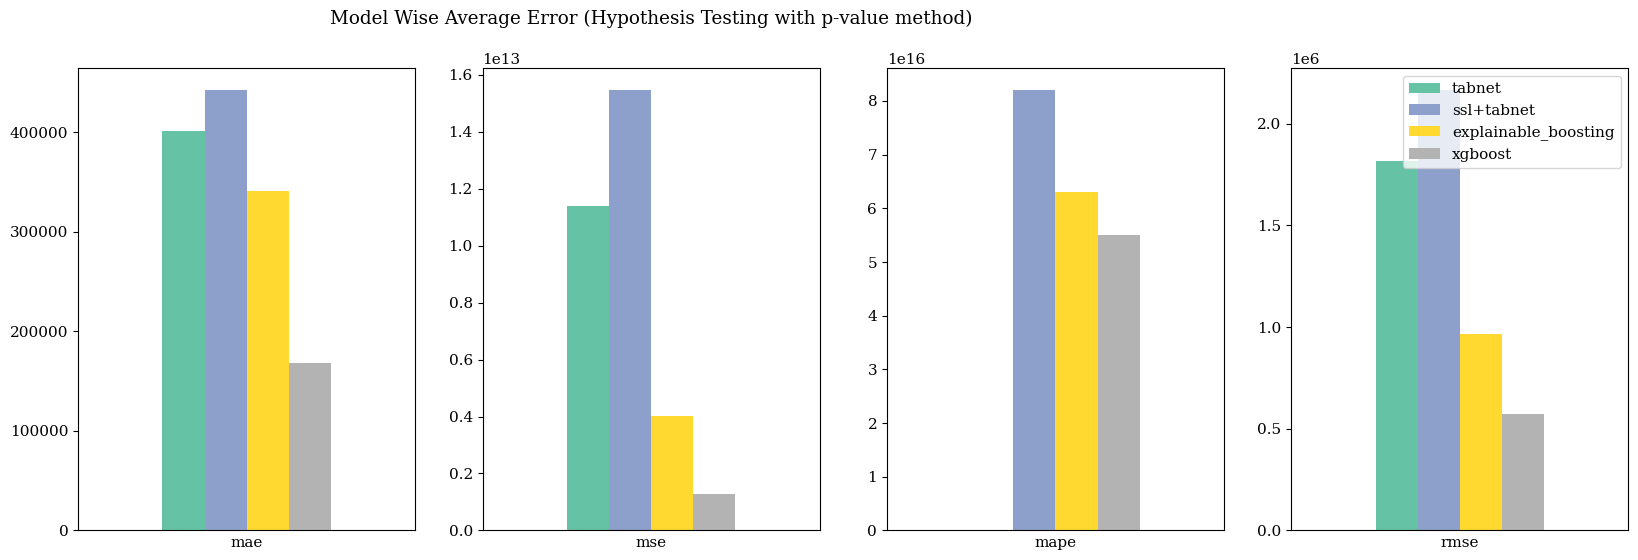

In [79]:
plt.figure(figsize=(20, 6))
for idx in range(4):
    ax=plt.subplot(1,4, idx+1)
    ax.set_xlabel(xdf["index"][idx])
    if idx==1:
        ax.set_title("Model Wise Average Error (Hypothesis Testing with p-value method)\n")
    xdf.iloc[[idx],:].plot.bar(ax=ax, legend=idx==3, xticks=[], cmap="Set2")
plt.savefig("model-based-hypothesis-testing.png")

In [80]:
# Which dataset experienced the highest average error
# Which dataset experienced the lowest average error

d = {'mae': {'livestock_meat_import': 60558,
  'future_sales': None,
  'product_demand': 618,
  'online_retail_2': 4,
  'online_retail': 2},
 'mse': {'livestock_meat_import': 24288270905,
  'future_sales': 0,
  'product_demand': 38450217,
  'online_retail_2': 7940,
  'online_retail': 141},
 'mape': {'livestock_meat_import': 65,
  'future_sales': None,
  'product_demand': 32620537937419800,
  'online_retail_2': 0,
  'online_retail': 0},
 'rmse': {'livestock_meat_import': 155846,
  'future_sales': 0,
  'product_demand': 6200,
  'online_retail_2': 89,
  'online_retail': 11}}
xdf = pd.DataFrame(d).T.reset_index()
xdf

,index,livestock_meat_import,future_sales,product_demand,online_retail_2,online_retail
0,mae,6.055800e+04,NaN,6.180000e+02,4.0,2.0
1,mse,2.428827e+10,0.0,3.845022e+07,7940.0,141.0
2,mape,6.500000e+01,NaN,3.262054e+16,0.0,0.0
3,rmse,1.558460e+05,0.0,6.200000e+03,89.0,11.0


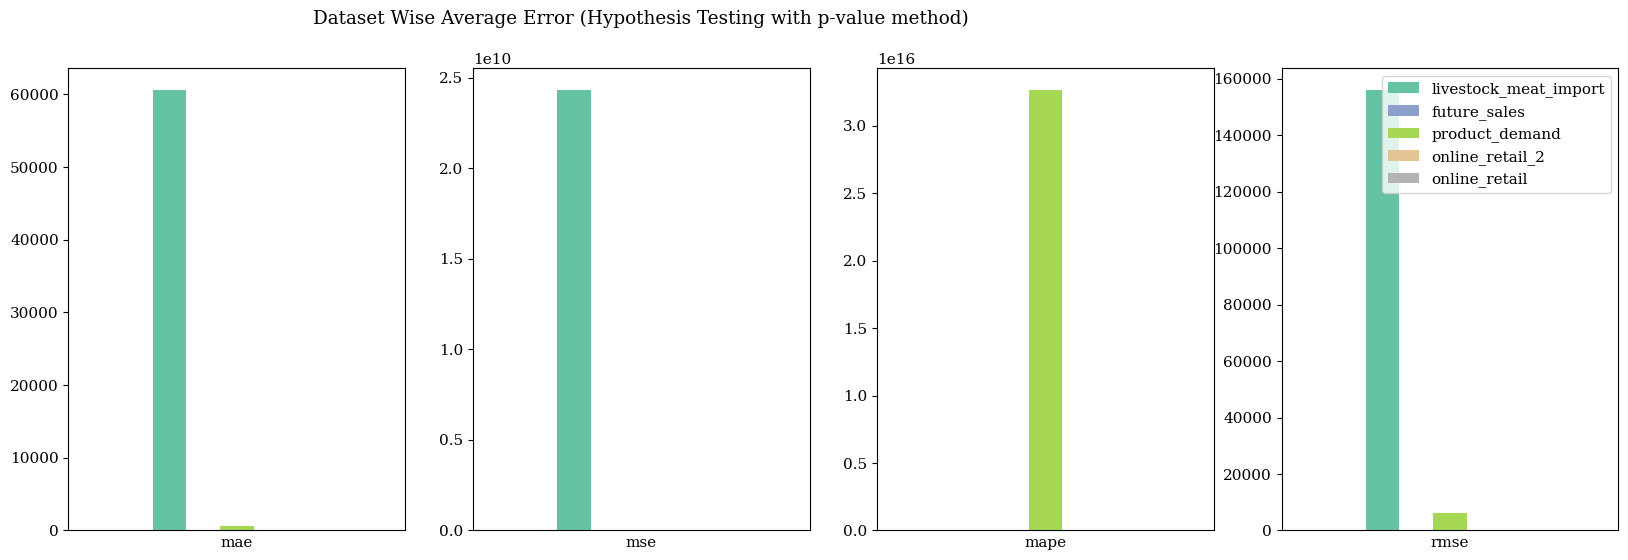

In [81]:
plt.figure(figsize=(20, 6))
for idx in range(4):
    ax=plt.subplot(1,4, idx+1)
    ax.set_xlabel(xdf["index"][idx])
    if idx==1:
        ax.set_title("Dataset Wise Average Error (Hypothesis Testing with p-value method)\n")
    xdf.iloc[[idx],:].plot.bar(ax=ax, legend=idx==3, xticks=[], cmap="Set2")
plt.savefig("dataset-based-hypothesis-testing.png")

In [20]:
# Which dataset+model causes the highest average error
# Which dataset+model causes the lowest average error

d = {'mae': {'tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': 11},
  'ssl+tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'explainable_boosting': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'xgboost': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None}},
 'mse': {'tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'ssl+tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'explainable_boosting': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'xgboost': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None}},
 'mape': {'tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'ssl+tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'explainable_boosting': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': 0},
  'xgboost': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': 0,
   'online_retail': None}},
 'train_rmse': {'tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'ssl+tabnet': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'explainable_boosting': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None},
  'xgboost': {'livestock_meat_import': None,
   'future_sales': None,
   'product_demand': None,
   'online_retail_2': None,
   'online_retail': None}}}

pd.DataFrame(d)

,mae,mse,mape,train_rmse
tabnet,"{'livestock_meat_import': None, 'future_sales'...","{'livestock_meat_import': None, 'future_sales'...","{'livestock_meat_import': None, 'future_sales'...","{'livestock_meat_import': None, 'future_sales'..."
ssl+tabnet,"{'livestock_meat_import': None, 'future_sales'...","{'livestock_meat_import': None, 'future_sales'...","{'livestock_meat_import': None, 'future_sales'...","{'livestock_meat_import': None, 'future_sales'..."
explainable_boosting,"{'livestock_meat_import': None, 'future_sales'...","{'livestock_meat_import': None, 'future_sales'...","{'livestock_meat_import': None, 'future_sales'...","{'livestock_meat_import': None, 'future_sales'..."
xgboost,"{'livestock_meat_import': None, 'future_sales'...","{'livestock_meat_import': None, 'future_sales'...","{'livestock_meat_import': None, 'future_sales'...","{'livestock_meat_import': None, 'future_sales'..."


# Effect of feature-engg vs normal dataset

In [31]:
# Effect of feature-engg vs normal dataset


from tqdm import tqdm
metrics_pair = [
    ["test_mae", "train_mae", 1], ["test_mse", "train_mse", 1000000000], ["test_mape", "train_mape", 1000000000000], ["train_rmse", "test_rmse", 100]
]
aver = {}
for metrcs in metrics_pair:
    print("=====================")
    a, b, step = metrcs
    # print(metrcs)
    metric_name = a.replace('test_', '').replace('train_', '')
    aver[metric_name] = {}
    # print(aver)
    for model in df.extra_feat.unique():
        print(model)
        sel = df[df["extra_feat"] == model]
        ready = pd.concat([sel[a], sel[b]], axis=0)
        # print(ready.describe())
        range_1 = None
        for u in tqdm(range(int(ready.min()), int(ready.max()), step)):
            flag = p_value_stat(ready, mu=u)
            if flag and range_1 is None:
                range_1 = u
                break
            last_u = u
        aver[metric_name]["Featature Engg." if model else "Original"] = range_1
        print(range_1)
aver

False


  0%|                                                                                                                                                                             | 0/1561040 [00:00<?, ?it/s]


0
True


  0%|                                                                                                                                                                             | 0/1410110 [00:00<?, ?it/s]


0
False


 14%|██████████████████████                                                                                                                                            | 8631/63470 [00:01<00:11, 4779.64it/s]


8631000000002
True


 10%|███████████████▉                                                                                                                                                  | 5801/58877 [00:01<00:11, 4508.57it/s]


5801000000000
False


  0%|                                                                                                                                                                              | 0/340760 [00:00<?, ?it/s]


0
True


  0%|                                                                                                                                                                              | 0/396815 [00:00<?, ?it/s]


0
False


  0%|                                                                                                                                                                             | 0/7966799 [00:00<?, ?it/s]


1
True


 13%|███████████████████▊                                                                                                                                          | 962573/7673099 [03:16<22:48, 4902.53it/s]

962573


{'mae': {'Original': 0, 'Featature Engg.': 0},
 'mse': {'Original': 8631000000002, 'Featature Engg.': 5801000000000},
 'mape': {'Original': 0, 'Featature Engg.': 0},
 'rmse': {'Original': 1, 'Featature Engg.': 962573}}

In [27]:
# Effect of feature-engg vs normal dataset 
d = {'mae': {'Original': 0, 'Featature Engg.': 0},
 'mse': {'Original': 8631000000002, 'Featature Engg.': 5801000000000},
 'mape': {'Original': 0, 'Featature Engg.': 0},
 'rmse': {'Original': 1, 'Featature Engg.': 962600}}
xdf = pd.DataFrame(d).T.reset_index()
xdf

,index,Original,Featature Engg.
0,mae,0,0
1,mse,8631000000002,5801000000000
2,mape,0,0
3,rmse,1,962600


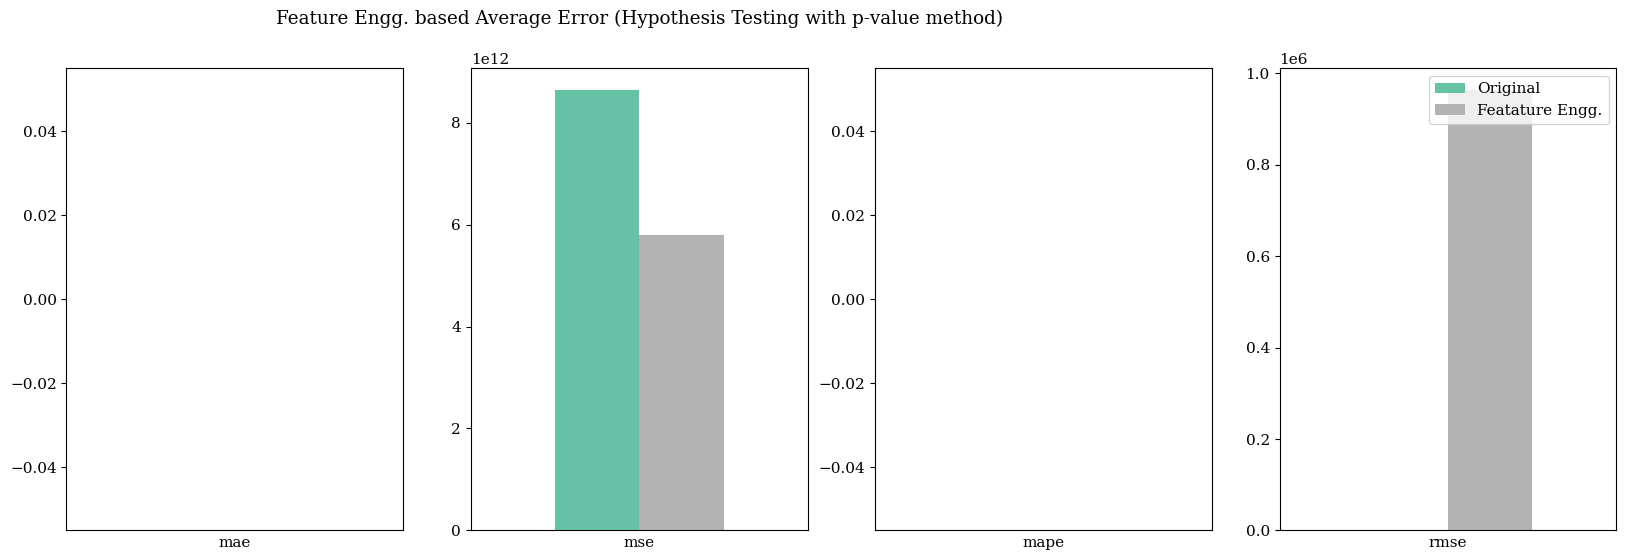

In [30]:
plt.figure(figsize=(20, 6))
for idx in range(4):
    ax=plt.subplot(1,4, idx+1)
    ax.set_xlabel(xdf["index"][idx])
    if idx==1:
        ax.set_title("Feature Engg. based Average Error (Hypothesis Testing with p-value method)\n")
    xdf.iloc[[idx],:].plot.bar(ax=ax, legend=idx==3, xticks=[], cmap="Set2")
plt.savefig("featureengg-based-hypothesis-testing.png")